In [64]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder



In [65]:
ventas = pd.read_csv("resultadosVentas.csv", decimal=",")
df = ventas.copy()

/var/folders/37/x57w4bp561x9sj71bs9nmw0w0000gn/T/ipykernel_54763/1320697883.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  ventas = pd.read_csv("resultadosVentas.csv", decimal=",")


In [66]:
df.head()

,IdCliente,Provincia,Grupo,Ventas 2018,Unidades 2018,Tickets 2018,Antigüedad,Ventas 2017,Unidades 2017,Tickets 2017,Ventas 2016,Unidades 2016,Tickets 2016,Ventas 2015,Unidades 2015,Tickets 2015,Ventas 2014,Unidades 2014,Tickets 2014
0,Cliente 1,29,Tienda/Supermercado de Alimentacion,1525.788,2213.28,46,2009-01-05 09:45:21.000,3292.9751,2307.37,38.0,3545.6107,4569.7,49.0,6306.3445,8004.09,91.0,6439.1802,8519.13,83.0
1,Cliente 2,29,NaN,115.8179,82.97,1,2009-01-03 10:48:33.000,286.9034,145.04,3.0,446.0571,321.39,12.0,135.4624,91.62,4.0,190.4443,175.68,7.0
2,Cliente 3,29,Tienda/Supermercado de Alimentacion,25670.9588,35516.11,236,2009-01-03 09:07:38.000,27947.2056,36381.85,256.0,33964.779,41264.9,257.0,36267.5888,42266.22,338.0,36096.9745,41184.69,348.0
3,Cliente 4,29,Tienda/Supermercado de Alimentacion,39519.3851,42299.2,358,2009-01-05 05:31:46.000,25968.0955,38376.72,231.0,14953.0722,24823.03,170.0,15524.3915,25823.11,248.0,13159.2442,21074.77,175.0
4,Cliente 5,29,Tienda/Supermercado de Alimentacion,2555.5218,2587.39,20,2009-01-12 11:39:56.000,3455.6742,2657.39,24.0,3335.1821,2684.27,31.0,1278.0458,950.49,10.0,1095.3949,563.89,7.0


In [67]:
df.sample(5)

,IdCliente,Provincia,Grupo,Ventas 2018,Unidades 2018,Tickets 2018,Antigüedad,Ventas 2017,Unidades 2017,Tickets 2017,Ventas 2016,Unidades 2016,Tickets 2016,Ventas 2015,Unidades 2015,Tickets 2015,Ventas 2014,Unidades 2014,Tickets 2014
12215,Cliente 12216,29,NaN,680.7592,402.66,3,2011-07-11 19:31:49.000,NaN,NaN,NaN,NaN,NaN,NaN,607.0838,389.48,7.0,373.154,212.56,4.0
35343,Cliente 35344,29,NaN,132.7274,100.95,4,2012-03-31 12:44:24.000,319.346,518.05,8.0,243.886,185,1.0,1909.178,1484.54,27.0,3401.6008,2139.62,57.0
1854,Cliente 1855,14,Distribuidor,6019.507,1314,47,2009-01-15 18:57:50.000,1709.39,681,26.0,3265.044,733,36.0,1536.973,312,21.0,2889.896,422,36.0
36530,Cliente 36531,14,Otros,4564.6592,3385.8,79,2015-05-23 11:48:42.000,3597.3254,2269.94,52.0,4114.1184,6488.75,61.0,1447.6369,816.76,49.0,NaN,NaN,NaN
34805,Cliente 34806,14,Particulares,2050.8057,1507.48,11,2010-12-09 09:26:51.000,3961.8851,4554.6,29.0,615.4825,250.22,4.0,2319.247,1120,19.0,1107.757,291,11.0


In [68]:
df.shape

(38787, 19)

In [69]:
df.columns

Index(['IdCliente', 'Provincia', 'Grupo', 'Ventas 2018', 'Unidades 2018',
       'Tickets 2018', 'Antigüedad', 'Ventas 2017', 'Unidades 2017',
       'Tickets 2017', 'Ventas 2016', 'Unidades 2016', 'Tickets 2016',
       'Ventas 2015', 'Unidades 2015', 'Tickets 2015', 'Ventas 2014',
       'Unidades 2014', 'Tickets 2014'],
      dtype='object')

In [70]:
df.dtypes  #solo se salvan tickets

IdCliente         object
Provincia         object
Grupo             object
Ventas 2018       object
Unidades 2018     object
Tickets 2018       int64
Antigüedad        object
Ventas 2017       object
Unidades 2017     object
Tickets 2017     float64
Ventas 2016       object
Unidades 2016     object
Tickets 2016     float64
Ventas 2015       object
Unidades 2015     object
Tickets 2015     float64
Ventas 2014       object
Unidades 2014     object
Tickets 2014     float64
dtype: object

In [71]:
df['Antigüedad'] = pd.to_datetime(df['Antigüedad'])

In [72]:
#Valores nulos en columnas
df.Provincia.value_counts()

29    10457
14     7787
41     4668
11     3303
23     2696
      ...  
16        1
35        1
20        1
32        1
12        1
Name: Provincia, Length: 82, dtype: int64

In [73]:
df.Grupo.value_counts()

Horeca (Bares, Restaurante, Cafet.)    10246
Tienda/Supermercado de Alimentacion     8195
Otros                                   4802
Particulares                            2355
Distribuidor                            1189
Empleados                                651
Drogueria                                245
Name: Grupo, dtype: int64

In [74]:
df.isna().sum()    #Analizar esto, años se ve q va decreciendo
#vemos q coinciden entre ventas,unidades,tickets

IdCliente            0
Provincia            7
Grupo            11104
Ventas 2018          0
Unidades 2018        0
Tickets 2018         0
Antigüedad           0
Ventas 2017       7165
Unidades 2017     7165
Tickets 2017      7165
Ventas 2016      10701
Unidades 2016    10701
Tickets 2016     10701
Ventas 2015      13962
Unidades 2015    13962
Tickets 2015     13962
Ventas 2014      17109
Unidades 2014    17109
Tickets 2014     17109
dtype: int64

In [75]:
#Convierto solo ventas2018
df['Ventas 2018']= df['Ventas 2018'].astype(float)

In [76]:
df.dtypes

IdCliente                object
Provincia                object
Grupo                    object
Ventas 2018             float64
Unidades 2018            object
Tickets 2018              int64
Antigüedad       datetime64[ns]
Ventas 2017              object
Unidades 2017            object
Tickets 2017            float64
Ventas 2016              object
Unidades 2016            object
Tickets 2016            float64
Ventas 2015              object
Unidades 2015            object
Tickets 2015            float64
Ventas 2014              object
Unidades 2014            object
Tickets 2014            float64
dtype: object

In [77]:
#Analizar los nan en columna grupo
df.groupby('Grupo')['Ventas 2018'].mean()
#podemos tener alguna idea a q grupo pertenece a partir de las ventas. 
#ML supervisado clasificacion multiclase (7Clases)

Grupo
Distribuidor                           8528.932163
Drogueria                              5026.802040
Empleados                              1457.894711
Horeca (Bares, Restaurante, Cafet.)    6938.108929
Otros                                  3094.912363
Particulares                           1533.133810
Tienda/Supermercado de Alimentacion    9310.509890
Name: Ventas 2018, dtype: float64

In [78]:
df.Antigüedad
 

0       2009-01-05 09:45:21
1       2009-01-03 10:48:33
2       2009-01-03 09:07:38
3       2009-01-05 05:31:46
4       2009-01-12 11:39:56
                ...        
38782   2018-11-21 18:04:14
38783   2018-12-13 17:23:42
38784   2018-12-20 13:23:19
38785   2018-12-28 19:14:02
38786   2018-08-02 10:49:56
Name: Antigüedad, Length: 38787, dtype: datetime64[ns]

In [79]:
#Eliminar hora
df["Antiguedad_sin_hora"] = df['Antigüedad'].dt.date

In [80]:
df.Antiguedad_sin_hora.value_counts()

#Analizar h

2009-01-02    1441
2009-01-05     928
2009-01-03     926
2009-01-07     680
2009-01-08     571
              ... 
2009-11-14       1
2010-04-24       1
2009-09-12       1
2013-05-25       1
2017-06-10       1
Name: Antiguedad_sin_hora, Length: 3007, dtype: int64

In [81]:
#Grupo missing values estudio impacto
(df.Grupo.isna().sum() / df.IdCliente.count() ) *100


28.628148606491866

In [82]:
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################

In [83]:
#knn (7Clases) para columna grupo

In [84]:
df.Grupo.count()

27683

In [85]:
df_modelo = df.copy()

In [86]:
df_modelo = df_modelo.dropna(subset=["Ventas 2018"])

In [87]:
df_modelo["Ventas 2018"].isna().sum()

0

In [88]:
df_modelo.sample(5)

,IdCliente,Provincia,Grupo,Ventas 2018,Unidades 2018,Tickets 2018,Antigüedad,Ventas 2017,Unidades 2017,Tickets 2017,Ventas 2016,Unidades 2016,Tickets 2016,Ventas 2015,Unidades 2015,Tickets 2015,Ventas 2014,Unidades 2014,Tickets 2014,Antiguedad_sin_hora
23922,Cliente 23923,41,NaN,243.7090,1205,3,2016-06-16 12:08:01,2199.279,12028,27.0,1037.976,5888,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-06-16
31463,Cliente 31464,29,Tienda/Supermercado de Alimentacion,6064.3907,8085.62,40,2017-08-14 13:53:31,2076.4262,2208.95,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-14
34998,Cliente 34999,41,Distribuidor,2849.6389,2754.45,41,2009-01-03 10:01:58,2397.7389,2252.64,23.0,1979.5754,1583.18,25.0,11496.5093,8951.72,167.0,10925.6726,7816.32,165.0,2009-01-03
22850,Cliente 22851,29,Tienda/Supermercado de Alimentacion,738.3640,1240,5,2015-11-11 10:01:11,2322.2287,3252.1,17.0,6019.173,9235,60.0,891.2843,1482.72,12.0,NaN,NaN,NaN,2015-11-11
2891,Cliente 2892,41,Particulares,3461.0425,4346.81,33,2009-01-08 16:08:45,2882.2436,2630.55,43.0,6159.6749,5204.76,77.0,5585.0284,6332.75,40.0,15702.531,22012.64,72.0,2009-01-08


In [89]:
le = LabelEncoder()
df_modelo['Grupo_encoded'] = le.fit_transform(df['Grupo'])
print(df_modelo[['Grupo', 'Grupo_encoded']].head())
print("Mapeo:", dict(zip(le.classes_, le.transform(le.classes_))))


                                 Grupo  Grupo_encoded
0  Tienda/Supermercado de Alimentacion              6
1                                  NaN              7
2  Tienda/Supermercado de Alimentacion              6
3  Tienda/Supermercado de Alimentacion              6
4  Tienda/Supermercado de Alimentacion              6
Mapeo: {'Distribuidor': 0, 'Drogueria': 1, 'Empleados ': 2, 'Horeca (Bares, Restaurante, Cafet.)': 3, 'Otros': 4, 'Particulares': 5, 'Tienda/Supermercado de Alimentacion': 6, nan: 7}


In [90]:
df_modelo.dtypes

IdCliente                      object
Provincia                      object
Grupo                          object
Ventas 2018                   float64
Unidades 2018                  object
Tickets 2018                    int64
Antigüedad             datetime64[ns]
Ventas 2017                    object
Unidades 2017                  object
Tickets 2017                  float64
Ventas 2016                    object
Unidades 2016                  object
Tickets 2016                  float64
Ventas 2015                    object
Unidades 2015                  object
Tickets 2015                  float64
Ventas 2014                    object
Unidades 2014                  object
Tickets 2014                  float64
Antiguedad_sin_hora            object
Grupo_encoded                   int64
dtype: object

In [91]:
train_data = df_modelo[df_modelo['Grupo_encoded'] != 7]
predict_data = df_modelo[df_modelo['Grupo_encoded'] == 7]

In [92]:
(train_data['Grupo_encoded'] == 7).any()

False

In [93]:
(predict_data['Grupo_encoded'] == 7).any()

True

In [94]:
X_train = train_data[['Ventas 2018', 'Unidades 2018', 'Tickets 2018']]
y_train = train_data['Grupo_encoded']

In [95]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2)


In [96]:
X_predict = predict_data[['Ventas 2018', 'Unidades 2018', 'Tickets 2018']]

In [97]:
model_knn = KNeighborsClassifier(n_neighbors=8)  
model_knn.fit(X_train_split, y_train_split)

KNeighborsClassifier(n_neighbors=8)

In [98]:
y_pred = model_knn.predict(X_test_split)
y_pred

# el problema está en que el array de y_pred no va ser del mismo tamaño q el train ni el test.

array([4, 3, 4, ..., 3, 3, 3])

In [99]:
print("\nEvaluación del modelo k-NN (conjunto de prueba):")
print("Accuracy:", accuracy_score(y_test_split, y_pred))
print("\nClasification Report:")
print(classification_report(y_test_split, y_pred))


Evaluación del modelo k-NN (conjunto de prueba):
Accuracy: 0.40021672385768464

Clasification Report:
              precision    recall  f1-score   support

           0       0.08      0.02      0.04       248
           1       0.00      0.00      0.00        48
           2       0.60      0.14      0.22       133
           3       0.45      0.65      0.53      1990
           4       0.24      0.20      0.22       976
           5       0.15      0.06      0.09       497
           6       0.43      0.42      0.42      1645

    accuracy                           0.40      5537
   macro avg       0.28      0.21      0.22      5537
weighted avg       0.36      0.40      0.37      5537



In [100]:
#modelo2

In [101]:
train_data = df_modelo[df_modelo['Grupo_encoded'] != 7]
predict_data = df_modelo[df_modelo['Grupo_encoded'] == 7]

In [102]:
train_data.shape

(27683, 21)

In [103]:
predict_data.shape

(11104, 21)

In [104]:
X_train = train_data[['Ventas 2018', 'Unidades 2018', 'Tickets 2018']]
y_train = train_data['Grupo_encoded']

In [105]:
model_knn2 = KNeighborsClassifier(n_neighbors=8)  
model_knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [106]:
X_predict2 = predict_data[['Ventas 2018', 'Unidades 2018', 'Tickets 2018']]

In [107]:
y_pred2 = model_knn2.predict(X_predict2)

In [108]:
y_pred2.shape

(11104,)

In [109]:
predict_data.sample(5)

,IdCliente,Provincia,Grupo,Ventas 2018,Unidades 2018,Tickets 2018,Antigüedad,Ventas 2017,Unidades 2017,Tickets 2017,...,Unidades 2016,Tickets 2016,Ventas 2015,Unidades 2015,Tickets 2015,Ventas 2014,Unidades 2014,Tickets 2014,Antiguedad_sin_hora,Grupo_encoded
7916,Cliente 7917,11,NaN,571.2790,752,4,2009-12-21 16:49:51,99.229,27,2.0,...,415,2.0,205.579,175,4.0,59.96,47,1.0,2009-12-21,7
17913,Cliente 17914,18,NaN,1177.7451,941.02,22,2014-05-16 13:16:01,1987.5346,2094.07,27.0,...,1748.48,27.0,3794.7923,4253.99,36.0,1247.594,1760.9,20.0,2014-05-16,7
30722,Cliente 30723,29,NaN,310.9063,188.36,3,2018-01-19 13:15:49,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-19,7
26271,Cliente 26272,29,NaN,126.7603,78.3,1,2015-10-06 12:08:14,439.166,493,1.0,...,3911,2.0,2634.166,2419,2.0,NaN,NaN,NaN,2015-10-06,7
7339,Cliente 7340,23,NaN,93.8900,28.22,2,2009-01-07 13:08:31,920.9678,304.68,8.0,...,357.88,5.0,NaN,NaN,NaN,7.063,3,1.0,2009-01-07,7


In [110]:

print(df_modelo[['Grupo']].head())


                                 Grupo
0  Tienda/Supermercado de Alimentacion
1                                  NaN
2  Tienda/Supermercado de Alimentacion
3  Tienda/Supermercado de Alimentacion
4  Tienda/Supermercado de Alimentacion


In [112]:
nan_mask = df_modelo['Grupo'].isna() 


In [113]:
df_modelo.loc[nan_mask, 'Grupo'] = y_pred2

In [114]:
df_modelo.Grupo.isna().sum()

0

In [115]:
df_modelo.Grupo.value_counts()

Horeca (Bares, Restaurante, Cafet.)    10246
Tienda/Supermercado de Alimentacion     8195
3                                       5160
Otros                                   4802
4                                       2980
Particulares                            2355
6                                       2207
Distribuidor                            1189
Empleados                                651
5                                        473
Drogueria                                245
0                                        224
2                                         51
1                                          9
Name: Grupo, dtype: int64

In [116]:
print("Mapping of labels:", dict(zip(le.classes_, le.transform(le.classes_))))


Mapping of labels: {'Distribuidor': 0, 'Drogueria': 1, 'Empleados ': 2, 'Horeca (Bares, Restaurante, Cafet.)': 3, 'Otros': 4, 'Particulares': 5, 'Tienda/Supermercado de Alimentacion': 6, nan: 7}


In [117]:
grupo_inverse_mapping = {
    0: 'Distribuidor',
    1: 'Drogueria',
    2: 'Empleados ',
    3: 'Horeca (Bares, Restaurante, Cafet.)',
    4: 'Otros',
    5: 'Particulares',
    6: 'Tienda/Supermercado de Alimentacion'
}

df_modelo['Grupo'] = df_modelo['Grupo'].replace(grupo_inverse_mapping)

In [118]:
df_modelo.Grupo.value_counts()

Horeca (Bares, Restaurante, Cafet.)    15406
Tienda/Supermercado de Alimentacion    10402
Otros                                   7782
Particulares                            2828
Distribuidor                            1413
Empleados                                702
Drogueria                                254
Name: Grupo, dtype: int64

In [119]:
df_modelo.Grupo.shape

(38787,)

In [120]:
df_modelo.Grupo.isna().sum()

0

In [121]:
df.Grupo.shape

(38787,)

In [122]:
#kMeans con df limpio

In [135]:
dfKmeans = df_modelo[["Provincia","Grupo","Ventas 2018","Unidades 2018","Tickets 2018","Antiguedad_sin_hora"]]

In [136]:
dfKmeans

,Provincia,Grupo,Ventas 2018,Unidades 2018,Tickets 2018,Antiguedad_sin_hora
0,29,Tienda/Supermercado de Alimentacion,1525.7880,2213.28,46,2009-01-05
1,29,"Horeca (Bares, Restaurante, Cafet.)",115.8179,82.97,1,2009-01-03
2,29,Tienda/Supermercado de Alimentacion,25670.9588,35516.11,236,2009-01-03
3,29,Tienda/Supermercado de Alimentacion,39519.3851,42299.2,358,2009-01-05
4,29,Tienda/Supermercado de Alimentacion,2555.5218,2587.39,20,2009-01-12
...,...,...,...,...,...,...
38782,4,Tienda/Supermercado de Alimentacion,971.5203,1479.77,12,2018-11-21
38783,4,"Horeca (Bares, Restaurante, Cafet.)",52.2100,22,1,2018-12-13
38784,4,"Horeca (Bares, Restaurante, Cafet.)",53.5920,50,1,2018-12-20
38785,18,Tienda/Supermercado de Alimentacion,173.0500,170,1,2018-12-28


In [137]:
dfKmeans['Grupo_encoded'] = le.fit_transform(dfKmeans['Grupo'])

/var/folders/37/x57w4bp561x9sj71bs9nmw0w0000gn/T/ipykernel_54763/2659854172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKmeans['Grupo_encoded'] = le.fit_transform(dfKmeans['Grupo'])


In [138]:
dfKmeans.Grupo_encoded.value_counts()

3    15406
6    10402
4     7782
5     2828
0     1413
2      702
1      254
Name: Grupo_encoded, dtype: int64

In [139]:
del dfKmeans["Grupo"]

In [140]:
dfKmeans.sample(5)

,Provincia,Ventas 2018,Unidades 2018,Tickets 2018,Antiguedad_sin_hora,Grupo_encoded
17056,28,2527.6490,1393,9,2012-01-25,3
27260,29,1017.0970,1510,24,2018-01-08,3
36888,29,6863.3931,8217.16,44,2015-12-09,3
8053,11,2493.7495,2103.59,14,2009-01-14,3
11777,23,2413.7665,2259.78,21,2010-11-09,5


In [144]:
dfKmeans.dtypes

Provincia               object
Ventas 2018            float64
Unidades 2018           object
Tickets 2018             int64
Antiguedad_sin_hora     object
Grupo_encoded            int64
dtype: object

In [150]:
dfKmeans.Provincia.isna().sum()

7

In [159]:
dfKmeans["Provincia"].str.contains("O9").any()

True

In [160]:
dfKmeans["Provincia"] = pd.to_numeric(dfKmeans["Provincia"], errors="coerce")

dfKmeans = dfKmeans.dropna(subset=["Provincia"])

/var/folders/37/x57w4bp561x9sj71bs9nmw0w0000gn/T/ipykernel_54763/1473928738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKmeans["Provincia"] = pd.to_numeric(dfKmeans["Provincia"], errors="coerce")


In [161]:
dfKmeans.Provincia.isna().sum()

0

In [165]:
dfKmeans['Antiguedad_sin_hora'] = pd.to_datetime(dfKmeans['Antiguedad_sin_hora'], errors='coerce')

/var/folders/37/x57w4bp561x9sj71bs9nmw0w0000gn/T/ipykernel_54763/935686532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKmeans['Antiguedad_sin_hora'] = pd.to_datetime(dfKmeans['Antiguedad_sin_hora'], errors='coerce')


In [166]:
dfKmeans['Antiguedad_sin_hora'] = (dfKmeans['Antiguedad_sin_hora'] - pd.to_datetime('2000-01-01')).dt.days

/var/folders/37/x57w4bp561x9sj71bs9nmw0w0000gn/T/ipykernel_54763/3094942331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKmeans['Antiguedad_sin_hora'] = (dfKmeans['Antiguedad_sin_hora'] - pd.to_datetime('2000-01-01')).dt.days


In [167]:
dfKmeans.Antiguedad_sin_hora

0        3292
1        3290
2        3290
3        3292
4        3299
         ... 
32763    6682
32764    6682
32765    6683
32766    6683
32767    6704
Name: Antiguedad_sin_hora, Length: 32759, dtype: int64

/Users/rushabhpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rushabhpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rushabhpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rushabhpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

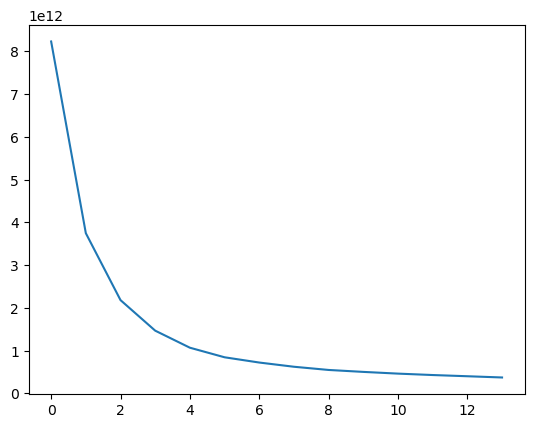

In [168]:
K = range(1,15)
inercia = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dfKmeans)
    inercia.append(kmeanModel.inertia_)
plt.plot(inercia)

In [169]:
km = KMeans(n_clusters = 5)
km.fit(dfKmeans)

/Users/rushabhpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [170]:
km.labels_

array([0, 0, 2, ..., 0, 0, 3], dtype=int32)

In [171]:
dfKmeans["cluster"] = km.labels_

/var/folders/37/x57w4bp561x9sj71bs9nmw0w0000gn/T/ipykernel_54763/1698046582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKmeans["cluster"] = km.labels_


In [172]:
dfKmeans[dfKmeans["cluster"] ==1].describe()

,Provincia,Ventas 2018,Tickets 2018,Antiguedad_sin_hora,Grupo_encoded,cluster
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.0
mean,24.107143,64490.827403,300.928571,4186.113636,5.025974,1.0
std,9.712389,18985.679198,141.166089,1135.926606,1.835048,0.0
min,4.000000,17834.148000,20.000000,3289.000000,0.000000,1.0
25%,18.000000,50782.766325,210.750000,3290.000000,4.000000,1.0
50%,29.000000,59070.688750,280.500000,3349.000000,6.000000,1.0
75%,29.000000,77756.838700,365.250000,5073.750000,6.000000,1.0
max,99.000000,120066.728100,900.000000,6687.000000,6.000000,1.0


In [173]:
dfKmeans[dfKmeans["cluster"] ==2].describe()

,Provincia,Ventas 2018,Tickets 2018,Antiguedad_sin_hora,Grupo_encoded,cluster
count,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.0
mean,23.897853,29748.292243,167.262028,4490.606958,4.652850,2.0
std,10.395366,9836.077718,87.219150,1208.961340,1.766391,0.0
min,0.000000,4387.690000,22.000000,3289.000000,0.000000,2.0
25%,14.000000,22898.561800,106.000000,3292.000000,3.000000,2.0
50%,29.000000,28139.690700,147.000000,4114.000000,6.000000,2.0
75%,29.000000,35135.699900,209.500000,5693.500000,6.000000,2.0
max,99.000000,79042.658900,640.000000,6848.000000,6.000000,2.0


In [174]:
dfKmeans[dfKmeans["cluster"] ==3].describe()

,Provincia,Ventas 2018,Tickets 2018,Antiguedad_sin_hora,Grupo_encoded,cluster
count,4773.000000,4773.00000,4773.000000,4773.000000,4773.00000,4773.0
mean,23.896501,11942.55542,85.272575,4719.166352,3.98282,3.0
std,10.539898,4830.85828,54.753858,1251.007999,1.59056,0.0
min,0.000000,990.01200,1.000000,3289.000000,0.00000,3.0
25%,14.000000,8332.39300,51.000000,3301.000000,3.00000,3.0
50%,23.000000,10946.00810,70.000000,4716.000000,3.00000,3.0
75%,29.000000,14705.93000,104.000000,5904.000000,6.00000,3.0
max,99.000000,35486.51550,617.000000,6915.000000,6.00000,3.0


In [175]:
dfKmeans[dfKmeans["cluster"] ==4].describe()

,Provincia,Ventas 2018,Tickets 2018,Antiguedad_sin_hora,Grupo_encoded,cluster
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.0
mean,21.303030,159452.312633,612.242424,4412.303030,4.575758,4.0
std,9.537704,46971.416025,514.850951,1190.507336,2.487849,0.0
min,4.000000,88353.366400,194.000000,3289.000000,0.000000,4.0
25%,11.000000,130788.491200,388.000000,3290.000000,4.000000,4.0
50%,23.000000,145159.495600,476.000000,4062.000000,6.000000,4.0
75%,29.000000,193167.143500,603.000000,5278.000000,6.000000,4.0
max,41.000000,286945.168300,2487.000000,6515.000000,6.000000,4.0


In [177]:
dfKmeans[dfKmeans["cluster"] ==0].describe()

,Provincia,Ventas 2018,Tickets 2018,Antiguedad_sin_hora,Grupo_encoded,cluster
count,26294.000000,26294.000000,26294.000000,26294.000000,26294.000000,26294.0
mean,23.081425,1489.378648,19.253328,4830.180535,3.982125,0.0
std,10.618507,1687.681309,28.760597,1260.972236,1.460175,0.0
min,0.000000,-2932.611900,1.000000,3289.000000,0.000000,0.0
25%,14.000000,216.354250,3.000000,3428.000000,3.000000,0.0
50%,23.000000,828.388000,10.000000,4774.000000,4.000000,0.0
75%,29.000000,2209.607025,25.000000,5997.000000,5.000000,0.0
max,99.000000,9703.411300,661.000000,6939.000000,6.000000,0.0


In [18]:
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################


In [19]:
##################### En sucio clase ###############################

In [20]:
df2018 = ventas[["IdCliente","Provincia","Grupo","Ventas 2018", "Unidades 2018","Tickets 2018"]] 

In [21]:
copia = df2018

In [22]:
#df2018["Grupo"]
vacio = []
for x in df2018["Grupo"]:
    vacio.append(x)
    
aa = set(vacio)
print(aa)
    



{'Tienda/Supermercado de Alimentacion', 'Particulares', 'Empleados ', 'Distribuidor', 'Horeca (Bares, Restaurante, Cafet.)', 'Drogueria', nan, 'Otros'}


In [23]:
import numpy as np

df2018["Grupo"] = df2018["Grupo"].replace("Horeca (Bares, Restaurante, Cafet.)",0 ) \
                    .replace("Empleados ", 1) \
                    .replace("Distribuidor",2 ) \
                    .replace("Drogueria", 3) \
                    .replace("Tienda/Supermercado de Alimentacion", 4 ) \
                    .replace("Otros",5 ) \
                    .replace("Particulares",6 ) \
                    .replace(np.nan, 7) 


/var/folders/37/x57w4bp561x9sj71bs9nmw0w0000gn/T/ipykernel_73773/3985563425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2018["Grupo"] = df2018["Grupo"].replace("Horeca (Bares, Restaurante, Cafet.)",0 ) \


In [24]:
vacio = []
for x in df2018["Grupo"]:
    vacio.append(x)
    
aa = set(vacio)
print(aa)
    

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}


In [25]:
copia2 = df2018

In [26]:
df2018 = df2018.drop("IdCliente", axis= 1)

In [27]:

df2018["Provincia"] = pd.to_numeric(df2018["Provincia"], errors="coerce")

df2018 = df2018.dropna(subset=["Provincia"])


In [28]:
#df2018["Grupo"]
vacio = []
for x in df2018["Ventas 2018"]:
    vacio.append(x)
    
a2 = set(vacio)
#print(a2)


    

In [29]:
df2018Escalado = scale(df2018)

/Users/rushabhpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rushabhpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rushabhpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rushabhpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

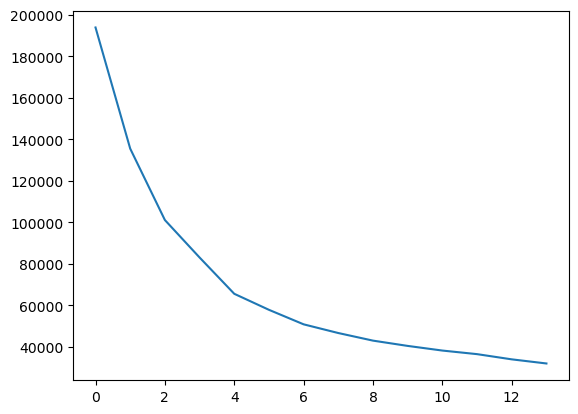

In [30]:
K = range(1,15)
inercia = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df2018Escalado)
    inercia.append(kmeanModel.inertia_)
plt.plot(inercia)

In [31]:
km = KMeans(n_clusters = 7)
km.fit(df2018Escalado)

/Users/rushabhpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7)

In [32]:
km.labels_

array([4, 4, 3, ..., 2, 2, 2], dtype=int32)

In [33]:
df2018["Ventas 2018"] = df2018["Ventas 2018"].astype("float64")

In [34]:
df2018["cluster"] = km.labels_

In [35]:
df2018

,Provincia,Grupo,Ventas 2018,Unidades 2018,Tickets 2018,cluster
0,29.0,4.0,1525.7880,2213.28,46,4
1,29.0,7.0,115.8179,82.97,1,4
2,29.0,4.0,25670.9588,35516.11,236,3
3,29.0,4.0,39519.3851,42299.2,358,3
4,29.0,4.0,2555.5218,2587.39,20,4
...,...,...,...,...,...,...
38782,4.0,4.0,971.5203,1479.77,12,2
38783,4.0,0.0,52.2100,22,1,6
38784,4.0,7.0,53.5920,50,1,2
38785,18.0,4.0,173.0500,170,1,2


In [36]:
df2018["Ventas 2018"] = df2018["Ventas 2018"].astype("float64")

In [37]:
df2018

,Provincia,Grupo,Ventas 2018,Unidades 2018,Tickets 2018,cluster
0,29.0,4.0,1525.7880,2213.28,46,4
1,29.0,7.0,115.8179,82.97,1,4
2,29.0,4.0,25670.9588,35516.11,236,3
3,29.0,4.0,39519.3851,42299.2,358,3
4,29.0,4.0,2555.5218,2587.39,20,4
...,...,...,...,...,...,...
38782,4.0,4.0,971.5203,1479.77,12,2
38783,4.0,0.0,52.2100,22,1,6
38784,4.0,7.0,53.5920,50,1,2
38785,18.0,4.0,173.0500,170,1,2


In [38]:
df2018[df2018["cluster"] ==1].describe()

,Provincia,Grupo,Ventas 2018,Tickets 2018,cluster
count,150.000000,150.000000,150.000000,150.000000,150.0
mean,22.886667,3.400000,102952.402630,436.686667,1.0
std,8.859482,1.305641,39669.184868,294.182593,0.0
min,4.000000,0.000000,56685.323500,101.000000,1.0
25%,18.000000,4.000000,80263.043125,306.750000,1.0
50%,29.000000,4.000000,90157.966650,394.500000,1.0
75%,29.000000,4.000000,111916.526925,508.250000,1.0
max,41.000000,5.000000,286945.168300,2487.000000,1.0


In [39]:
df2018[df2018["cluster"] ==2].describe()

,Provincia,Grupo,Ventas 2018,Tickets 2018,cluster
count,13211.000000,13211.000000,13211.000000,13211.000000,13211.0
mean,14.573386,5.739838,1572.972106,16.472258,2.0
std,4.596164,1.242474,2165.027105,19.596769,0.0
min,0.000000,3.000000,-184.930200,1.000000,2.0
25%,11.000000,5.000000,184.475550,3.000000,2.0
50%,14.000000,6.000000,729.984000,9.000000,2.0
75%,18.000000,7.000000,2082.455500,23.000000,2.0
max,24.000000,7.000000,20879.801600,169.000000,2.0


In [40]:
df2018[df2018["cluster"] ==3].describe()

,Provincia,Grupo,Ventas 2018,Tickets 2018,cluster
count,934.000000,934.000000,934.000000,934.000000,934.0
mean,23.786938,3.108137,40078.365288,233.478587,3.0
std,10.800967,1.659065,13434.150133,103.920785,0.0
min,0.000000,0.000000,5984.626500,20.000000,3.0
25%,14.000000,2.000000,30544.969075,158.250000,3.0
50%,29.000000,4.000000,38129.813800,217.000000,3.0
75%,29.000000,4.000000,48250.671750,283.750000,3.0
max,99.000000,6.000000,92693.391200,661.000000,3.0


In [41]:
df2018[df2018["cluster"] ==4].describe()

,Provincia,Grupo,Ventas 2018,Tickets 2018,cluster
count,10771.000000,10771.000000,10771.000000,10771.000000,10771.0
mean,33.209173,5.793055,1512.284953,15.276390,4.0
std,6.890197,1.315705,2230.512321,19.231218,0.0
min,24.000000,3.000000,-2932.611900,1.000000,4.0
25%,29.000000,4.000000,158.803000,2.000000,4.0
50%,29.000000,7.000000,603.968300,7.000000,4.0
75%,41.000000,7.000000,1895.229900,21.000000,4.0
max,99.000000,7.000000,36278.869500,144.000000,4.0


In [42]:
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
